In [2]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

In [17]:
N = 3
print(np.eye(N))
np.diagflat(np.ones(N - 1), -1)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [18]:
def finite_diff_2nd(N):
    """Create a N-by-N matrix corresponding to the second-order central difference formula.
    
    The returned matrix must be divided by h^2.
    """
    
    assert N > 2, "at least three points are required"
    
    main_diag = -2 * np.eye(N)
    down_diag = np.diagflat(np.ones(N - 1), -1)
    return main_diag + down_diag + down_diag.T

In [20]:
finite_diff_2nd(4)

array([[-2.,  1.,  0.,  0.],
       [ 1., -2.,  1.,  0.],
       [ 0.,  1., -2.,  1.],
       [ 0.,  0.,  1., -2.]])

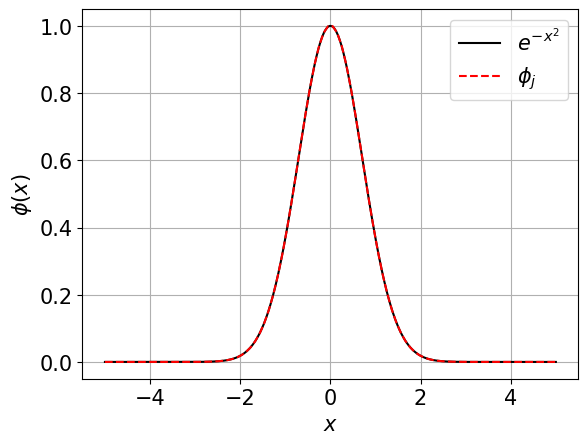

In [29]:
# boundary values
a, b = 0, 0

# uniformly discretized domain
N  = 100
xj = np.linspace(-5, 5, N)
h  = xj[1] - xj[0]

# right-hand side
wj = 2 * (2*xj**2 - 1) * np.exp(-xj**2)
wj[0], wj[-1] = a, b # this is where the boundary values go to

# finite difference matrix w/ boundary conditions imposed
D2 = finite_diff_2nd(N) / h**2
#print(D2)
# 1. decimate the first and last rows
D2[ 0, :] *= 0
D2[-1, :] *= 0
#print(D2)
# 2. replace 1,1 and N,N components with 1
D2[ 0,  0] = 1
D2[-1, -1] = 1
#print(D2)

# solve linear equations
phij = la.solve(D2, wj)

# draw
x_exact = np.linspace(xj[0], xj[-1], 500)
y_exact = [np.exp(-x*x) for x in x_exact]
plt.figure()
plt.plot(x_exact, y_exact,  "-k", label="$e^{-x^2}$")
plt.plot(xj     , phij   , "--r", label="$\\phi_j$")
plt.grid()
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$\\phi(x)$")
plt.show()

[[-196.02   98.01    0.   ...    0.      0.      0.  ]
 [  98.01 -196.02   98.01 ...    0.      0.      0.  ]
 [   0.     98.01 -196.02 ...    0.      0.      0.  ]
 ...
 [   0.      0.      0.   ... -196.02   98.01    0.  ]
 [   0.      0.      0.   ...   98.01 -196.02   98.01]
 [   0.      0.      0.   ...    0.     98.01 -196.02]]


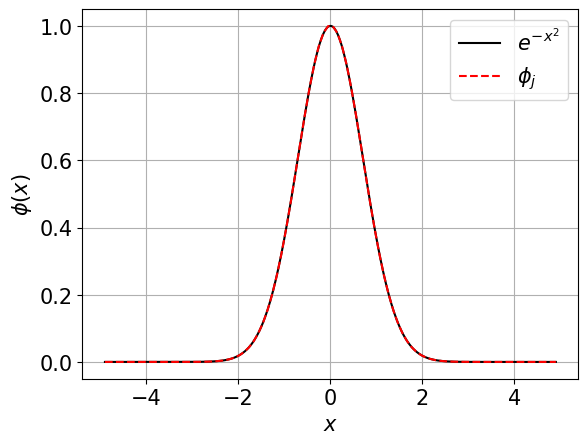

In [34]:
# uniformly discretized domain
N  = 100
xj = np.linspace(-5, 5, N)
xj = xj[1:-1]              # take only the interior points
h  = xj[1] - xj[0]

# right-hand side
wj = 2 * (2*xj**2 - 1) * np.exp(-xj**2)

# finite difference matrix w/ boundary conditions imposed
D2 = finite_diff_2nd(N) / h**2

# take only the interior sub-matrix
D2 = D2[1:-1, 1:-1]
print(D2)
# solve linear equations
phij = la.solve(D2, wj)

# draw
x_exact = np.linspace(xj[0], xj[-1], 500)
y_exact = [np.exp(-x*x) for x in x_exact]
plt.figure()
plt.plot(x_exact, y_exact,  "-k", label="$e^{-x^2}$")
plt.plot(xj     , phij   , "--r", label="$\\phi_j$")
plt.grid()
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$\\phi(x)$")
plt.show()

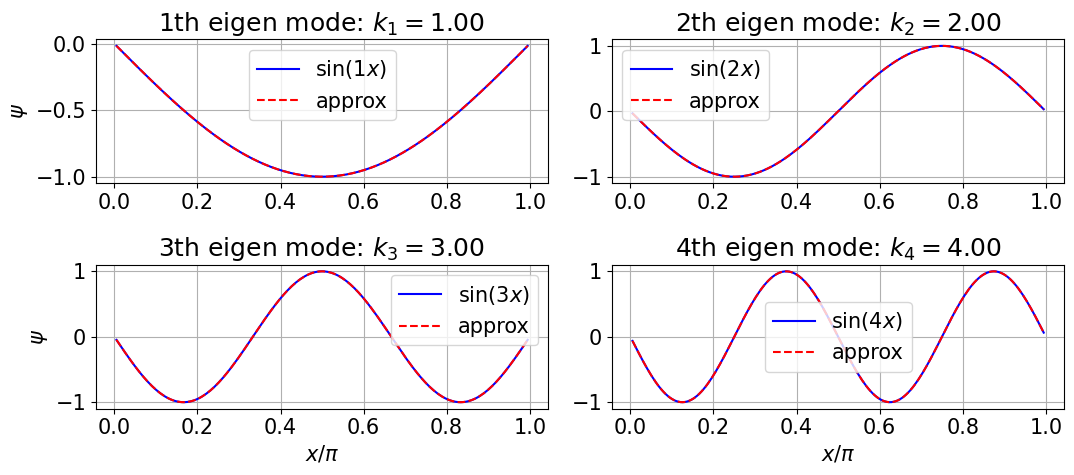

In [110]:
# discretization of domain
N  = 200
xj = np.linspace(0, np.pi, N)
h  = xj[1] - xj[0]
xj = xj[1:-1] # we are not interested in the boundary points

# finite difference matrix
D2 = finite_diff_2nd(N) / h**2

# take the inner matrix
D2 = D2[1:-1, 1:-1]

# eigenvalues and eigenvectors of D2
w, v = la.eig(D2)

# sort w's in descending order
i, w = zip(*sorted(enumerate(w), key=lambda x: -x[1]))
k    = np.sqrt(-np.array(w))
psi  = v[:, i]

# rescale eigenvectors so that max(|psi|) == 1
psi /= np.amax(np.abs(psi), 0).reshape([1, len(k)])
    #print(np.amax(psi))

# display first four solutions
plt.figure(figsize=[11, 5])

for n in range(1, 5):
    
    # exact wave function
    psi_exact = np.sin(n*xj)

    # this is to make the sign of psi_exact the same as the eigenvectors
    if min(psi_exact * psi[:, n-1]) < -0.5:
        psi_exact *= -1
    
    plt.subplot(2, 2, n)
    plt.plot(xj/np.pi, psi_exact  ,  "-b", label=f"$\\sin({n}x)$")
    plt.plot(xj/np.pi, psi[:, n-1], "--r", label=f"approx")
    plt.grid()
    plt.legend()
    plt.title(f"{n}th eigen mode: $k_{n} = {k[n-1]:.2f}$")

    if n == 3 or n == 4:
        plt.xlabel("$x/\\pi$")
    if n == 1 or n == 3:
        plt.ylabel("$\\psi$")

plt.tight_layout()
plt.show()

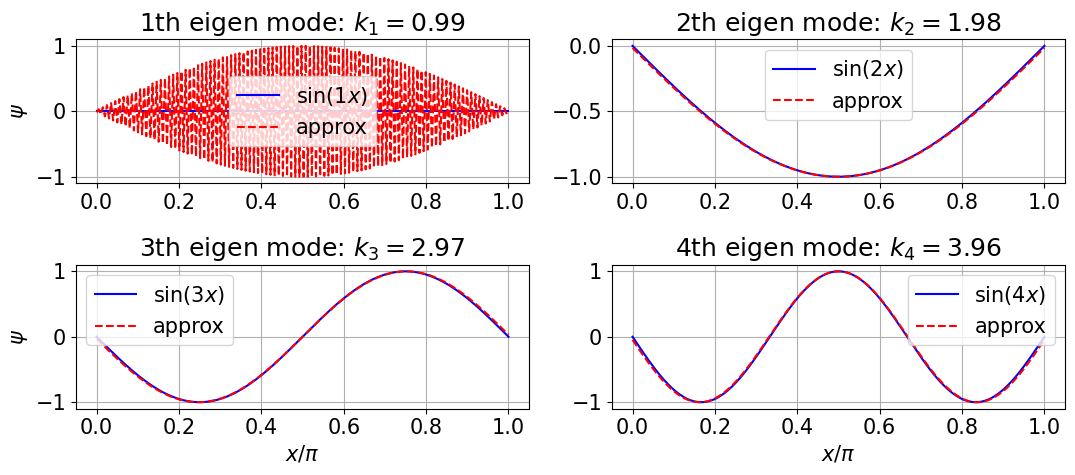

In [151]:
# discretization of domain
N  = 200
xj = np.linspace(0, np.pi, N)
h  = xj[1] - xj[0]

# finite difference matrix
D2 = finite_diff_2nd(N) / h**2

# take the inner matrix


# eigenvalues and eigenvectors of D2
w, v = la.eig(D2)

# sort w's in descending order
i, w = zip(*sorted(enumerate(w), key=lambda x: -x[1]))
k    = np.sqrt(-np.array(w))
psi  = v[:, i]

# rescale eigenvectors so that max(|psi|) == 1
psi /= np.amax(np.abs(psi), 0).reshape([1, len(k)])
    #print(np.amax(psi))

# display first four solutions
plt.figure(figsize=[11, 5])

for n in range(1, 5):
    
    # exact wave function
    psi_exact = np.sin((n-1)*xj)

    # this is to make the sign of psi_exact the same as the eigenvectors
    if min(psi_exact * psi[:, n]) < -0.5:
        psi_exact *= -1
    
    plt.subplot(2, 2, n)
    plt.plot(xj/np.pi, psi_exact  ,  "-b", label=f"$\\sin({n}x)$")
    plt.plot(xj/np.pi, psi[:, n-2], "--r", label=f"approx")
    plt.grid()
    plt.legend()
    plt.title(f"{n}th eigen mode: $k_{n} = {k[n-1]:.2f}$")

    if n == 3 or n == 4:
        plt.xlabel("$x/\\pi$")
    if n == 1 or n == 3:
        plt.ylabel("$\\psi$")

plt.tight_layout()
plt.show()

In [105]:
psi[:, n-1]

array([-0.0631076 , -0.12596363, -0.18831753, -0.24992075, -0.31052771,
       -0.36989681, -0.42779139, -0.48398068, -0.53824067, -0.59035508,
       -0.64011616, -0.68732555, -0.73179506, -0.77334742, -0.81181699,
       -0.84705042, -0.87890726, -0.90726051, -0.93199716, -0.9530186 ,
       -0.97024102, -0.98359578, -0.99302964, -0.99850498, -1.        ,
       -0.99750872, -0.99104108, -0.98062286, -0.96629559, -0.94811638,
       -0.9261577 , -0.90050709, -0.87126679, -0.83855336, -0.80249721,
       -0.76324208, -0.72094444, -0.6757729 , -0.62790753, -0.57753914,
       -0.52486851, -0.4701056 , -0.41346871, -0.35518362, -0.29548265,
       -0.23460381, -0.17278977, -0.11028693, -0.04734446,  0.01578673,
        0.078855  ,  0.14160893,  0.20379837,  0.2651754 ,  0.32549537,
        0.38451781,  0.44200746,  0.49773514,  0.55147869,  0.60302389,
        0.65216526,  0.69870691,  0.74246331,  0.78326003,  0.82093445,
        0.85533638,  0.88632869,  0.91378784,  0.93760435,  0.95

In [80]:
w = np.array([[1,2,3,4,5,6,7,8,9],
             [3,4,5,6,7,8,9,10,11]
             ])

In [70]:
i, w = zip(*sorted(enumerate(w), key=lambda x: x[1]))
print(i, w)

(8, 7, 6, 5, 4, 3, 2, 1, 0) (1, 2, 3, 4, 5, 6, 7, 8, 9)


In [152]:
np.amax(np.abs(w), 0)

16048.70059512527

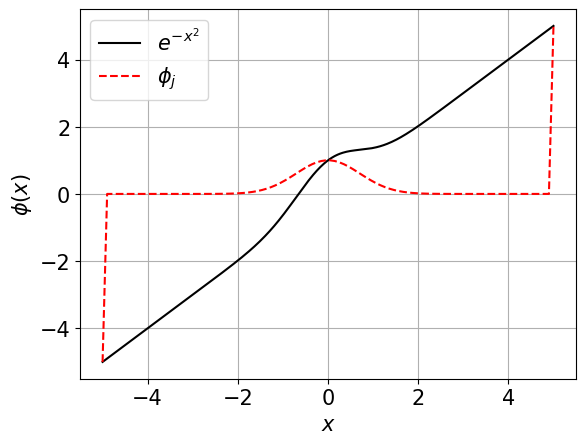

In [199]:
# uniformly discretized domain
N  = 100
xj = np.linspace(-5, 5, N)
h  = xj[1] - xj[0]

# right-hand side
wj = 2 * (2*xj**2 - 1) * np.exp(-xj**2) 

# finite difference matrix w/ boundary conditions imposed
D2 = finite_diff_2nd(N) / h**2

# take only the interior sub-matrix

# solve linear equations
phij = la.solve(D2, wj)
phij[0], phij[-1] = -5, 5

# draw
x_exact = np.linspace(xj[0], xj[-1], 500)
y_exact = [np.exp(-x*x) + x for x in x_exact]
plt.figure()
plt.plot(x_exact, y_exact,  "-k", label="$e^{-x^2}$")
plt.plot(xj     , phij   , "--r", label="$\\phi_j$")
plt.grid()
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$\\phi(x)$")
plt.show()

[[ 1.00000e+00  0.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 2.45025e+03 -4.90050e+03  2.45025e+03 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 0.00000e+00  2.45025e+03 -4.90050e+03 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 ...
 [ 0.00000e+00  0.00000e+00  0.00000e+00 ... -4.90050e+03  2.45025e+03
   0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 ...  2.45025e+03 -4.90050e+03
   2.45025e+03]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00
   1.00000e+00]]
n =   1, u(0) = -0.499948984797476
[[ 1.00000e+00  0.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 2.45025e+03 -4.90050e+03  2.45025e+03 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 0.00000e+00  2.45025e+03 -4.90050e+03 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 ...
 [ 0.00000e+00  0.00000e+00  0.00000e+00 ... -4.90050e+03  2.45025e+03
   0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 ...  2.45025e+03 -4.90050e+03
   2.45025e+0

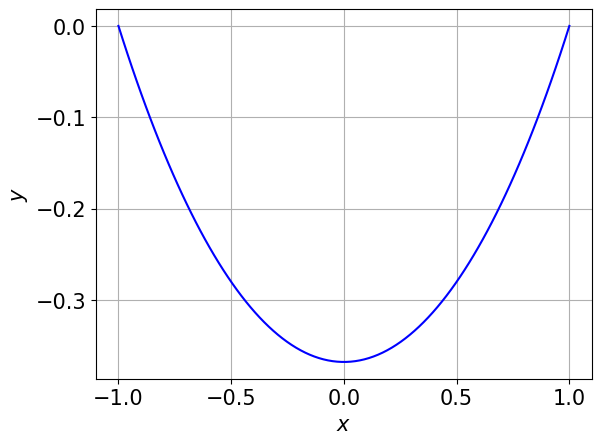

In [210]:
N  = 100
xj = np.linspace(-1, 1, N)
h  = xj[1] - xj[0]

D2 = finite_diff_2nd(N) / h**2
D2[ 0, :] *= 0
D2[-1, :] *= 0
D2[ 0,  0] = 1
D2[-1, -1] = 1

def predicate(u_new, u_old):
    delta = la.norm(u_new - u_old)
    return delta > 1e-7 * la.norm(u_new) # iterate until this is true

uj = np.zeros(N) # initial guess
n  = 0           # iteration count
while n < 1 or predicate(uj, u_prev):
    n       += 1
    u_prev   = uj
    
    rhs      = np.exp(uj)
    rhs[ 0] *= 0   # *important*: these are boundary values
    rhs[-1] *= 0   # *important*: these are boundary values
    uj       = la.solve(D2, rhs)
    print(D2)
    print(f"n = {n:3d}, u(0) = {uj[N // 2]:.15f}")
    
    if n > 50: # prevent accidental infinite loop
        break
        
plt.figure()
plt.plot(xj, uj, "-b")
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [212]:
def finite_diff_1st(N):
    """Create a N-by-N matrix corresponding to the first-order central difference formula.
    
    The returned matrix must be divided by h.
    """
    
    assert N > 2, "at least three points are required"
    
    off_diag = np.diagflat(0.5*np.ones(N - 1), +1)
    return off_diag - off_diag.T

In [215]:
N = 3
np.diagflat(0.5*np.ones(N - 1), +1)

array([[0. , 0.5, 0. ],
       [0. , 0. , 0.5],
       [0. , 0. , 0. ]])

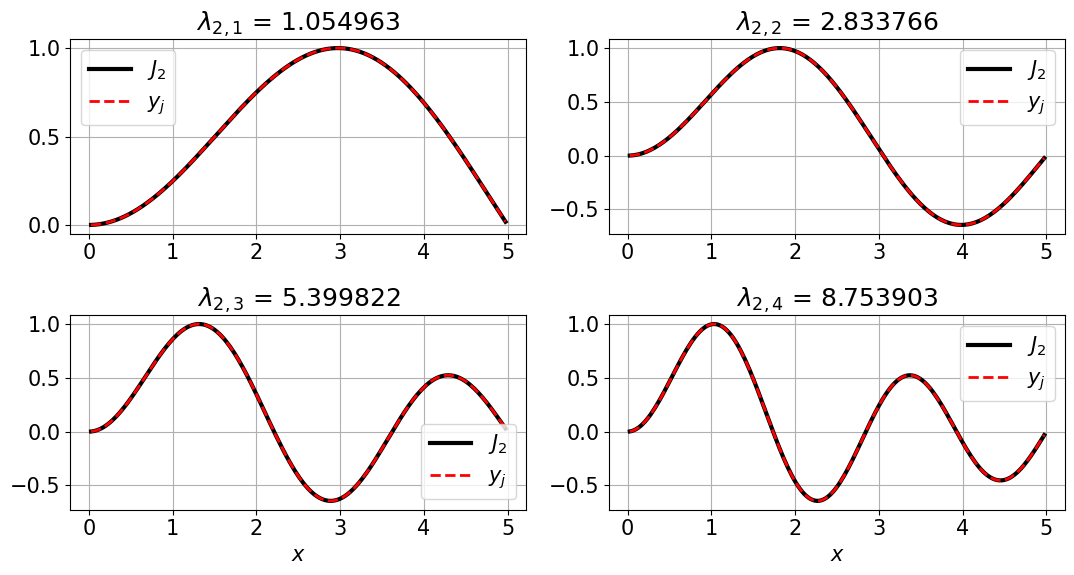

In [225]:
m  = 2
N  = 200
xj = np.linspace(0, 5, N)
h  = xj[1] - xj[0]

# we are stripping off boundary elements
xj   = xj[1:-1]
D2   = finite_diff_2nd(N)[1:-1, 1:-1] / h**2
D1   = finite_diff_1st(N)[1:-1, 1:-1] / h**1
invX = np.diagflat(1/xj)
L    = D2 + invX @ D1 - m**2 * invX @ invX

# eigen values & vectors of L
w, v = la.eig(L)
i, w = zip(*sorted(enumerate(w), key=lambda x: -x[1]))
lam  = -np.array(w)
yj   = v[:, i]
yj  /= np.amax(np.abs(yj), 0).reshape([1, len(lam)])

# import Bessel function
from scipy.special import jn as BesselJ

# draw solutions
plt.figure(figsize=[11, 6])

for ith in range(4):
    Jm  = BesselJ(m, np.sqrt(lam[ith])*xj)
    Jm /= max(abs(Jm))
    if min(Jm * yj[:, ith]) < -0.5: # this is to make the sign flip
        yj[:, ith] *= -1

    plt.subplot(2, 2, ith + 1)
    plt.plot(xj, Jm        ,  "-k", lw=3, label=f"$J_{m}$")
    plt.plot(xj, yj[:, ith], "--r", lw=2, label="$y_j$")
    plt.title(f"$\\lambda_{{{m},{ith + 1}}}$ = {lam[ith]:.6f}")
    plt.grid()
    plt.legend()
    if ith == 2 or ith == 3:
        plt.xlabel("$x$")

plt.tight_layout()
plt.show()

In [256]:
print(yj)
t = np.array([
    [1],[3],[5]])
t.reshape([1, 3])

[[ 1.71051459e-04  4.59190868e-04  8.74376409e-04 ... -5.78877971e-01
   5.80951890e-01  1.00000000e+00]
 [ 6.84129891e-04  1.83621583e-03  3.49551853e-03 ... -7.69848872e-01
   7.29717049e-01 -2.43481079e-01]
 [ 1.53891636e-03  4.12877555e-03  7.85508596e-03 ...  9.66379160e-01
  -1.00000000e+00  5.54942329e-02]
 ...
 [ 5.44230889e-02 -7.11506247e-02  8.39366712e-02 ...  9.59244034e-07
   3.12554465e-19  0.00000000e+00]
 [ 3.62070423e-02 -4.73800445e-02  5.59701260e-02 ... -6.35202715e-07
  -2.06970737e-19  0.00000000e+00]
 [ 1.80628986e-02 -2.36501469e-02  2.79606246e-02 ...  3.16001366e-07
   1.02964036e-19  0.00000000e+00]]


array([[1, 3, 5]])

In [243]:
a = np.arange(4).reshape((2,2))
a
b = np.array([
    [7, 1],
    [6, 5]
])

In [245]:
np.amax(b, 0)

array([7, 5])